In [1]:
from icot import InterpretableClusteringOptimalTree
from icot import tree_picture
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import time
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Testing

In [2]:
def plot_clusters(x, model, max_depth):
    """function plots 2d graph with colored clusters"""
    node_per_level = [2**i for i in range(max_depth+1)]
    nodes_ind = [i + 1 for i in range(2 ** (max_depth + 1) - 1)]
    leaf_ind = nodes_ind[-2**max_depth:]
    clusters = []
    z = [0] * node_per_level[-1]
    for k, v in model.z_.items():
        if k[1] in leaf_ind:
            if np.round(v) == 1:
                clusters.append(k[1]) 
    # silhouette
    s = np.mean([v for k,v in model.s_.items()])

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    x_coord = [x[i][0] for i in range(x.shape[0])]
    y_coord = [x[i][1] for i in range(x.shape[0])]
    ax.set_title(f'ICOT, s = {np.round(s,3)}', fontsize=18)
    colors = ['red','green','blue','purple', 'orange']
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.grid()
    ax.scatter(x_coord, y_coord, c=clusters, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show() 
    
def icot_tree_clusters(x, depth, dist, K_min):
    """fits ICOT, draws 2d with colored clusters, plots the tree"""
    startTime = time.time()

    icot_model = InterpretableClusteringOptimalTree(max_depth=depth, min_leaf_samples=10, min_cluster_number=K_min)
    icot_model.fit(x, dist)
    executionTime = (time.time() - startTime)
    print('Execution time in seconds: ' + str(executionTime))
    
    # plot clusters
    plot_clusters(x, icot_model, depth)
    
    # plot tree
    tree_picture(icot_model, depth, x)
    return icot_model

# My Dataset

In [3]:
df = pd.read_csv('Cluster_Clean.csv')
df = pd.get_dummies(df, drop_first=True)
df.describe()

,Sex,Age,Body Diagram,Pain severity (Mean),Pain Interference (Mean),# of pain medications,# of opioids,DEP (T-Score),ANX (T-Score),SOM (T-Score),Employment Status_2,Employment Status_3,Employment Status_Unknown,Smoke_2,Smoke_Unknown,Pain Stage_2,Pain Stage_3,Pain Stage_4,Pain Stage_Unknown
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,1.645,52.835,18.550,0.510,0.738,1.880,0.845,48.130,44.990,46.805,0.250,0.215,0.270,0.205,0.165,0.260,0.135,0.100,0.210
std,0.480,16.278,14.878,0.237,0.266,1.858,1.080,9.108,9.584,9.006,0.434,0.412,0.445,0.405,0.372,0.440,0.343,0.301,0.408
min,1.000,19.000,1.250,0.000,0.000,0.000,0.000,31.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,42.000,8.000,0.300,0.654,1.000,0.000,41.000,38.000,42.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.000,52.000,15.000,0.525,0.738,2.000,1.000,48.000,45.000,47.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.000,61.500,24.000,0.675,0.900,3.000,1.000,55.000,51.000,53.000,0.250,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
max,2.000,102.000,86.000,1.000,1.286,12.000,9.000,70.000,70.000,67.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [4]:
my_dist = pd.read_csv('All_Distance.csv')
my_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000,0.256,0.233,0.191,0.253,0.227,0.235,0.258,0.203,0.221,...,0.283,0.263,0.311,0.231,0.302,0.309,0.240,0.249,0.359,0.263
1,0.256,0.000,0.200,0.193,0.200,0.150,0.158,0.227,0.230,0.237,...,0.165,0.157,0.106,0.146,0.053,0.093,0.172,0.159,0.153,0.184
2,0.233,0.200,0.000,0.150,0.167,0.193,0.206,0.200,0.168,0.203,...,0.172,0.121,0.175,0.170,0.222,0.207,0.137,0.113,0.254,0.194
3,0.191,0.193,0.150,0.000,0.154,0.166,0.141,0.160,0.198,0.165,...,0.147,0.200,0.227,0.183,0.232,0.229,0.118,0.192,0.267,0.129
4,0.253,0.200,0.167,0.154,0.000,0.141,0.134,0.145,0.230,0.142,...,0.118,0.127,0.204,0.118,0.187,0.211,0.139,0.160,0.229,0.146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.309,0.093,0.207,0.229,0.211,0.187,0.229,0.264,0.257,0.285,...,0.162,0.153,0.104,0.184,0.086,0.000,0.170,0.196,0.121,0.203
196,0.240,0.172,0.137,0.118,0.139,0.099,0.160,0.189,0.235,0.226,...,0.098,0.137,0.183,0.123,0.193,0.170,0.000,0.160,0.227,0.133
197,0.249,0.159,0.113,0.192,0.160,0.206,0.190,0.279,0.171,0.196,...,0.181,0.089,0.197,0.151,0.174,0.196,0.160,0.000,0.241,0.177
198,0.359,0.153,0.254,0.267,0.229,0.225,0.276,0.274,0.329,0.321,...,0.192,0.220,0.187,0.174,0.186,0.121,0.227,0.241,0.000,0.286


In [5]:
icot_2 = icot_tree_clusters(np.array(df), 2, np.array(my_dist),2)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 2000
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3543 rows, 3928 columns and 41970 nonzeros
Model fingerprint: 0xfa774ddf
Model has 2200 quadratic constraints
Model has 1600 general constraints
Variable types: 1717 continuous, 2211 integer (2207 binary)
Coefficient statistics:
  Matrix range     [4e-03, 1e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [3e-02, 1e+00]
  Objective range  [5e-03, 5e-03]
  Bounds range     [4e-01, 2e+02]
  RHS range        [1e+00, 2e+00]
  QRHS range       [1e+00, 1e+00]
  GenCon rhs range [4e+00, 4e+00]
  GenCon coe range [1e+00, 4e+00]
Presolve added 2393 rows and 0 col

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 1000
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3426 rows, 3871 columns and 41736 nonzeros
Model fingerprint: 0x00830846
Model has 2200 quadratic constraints
Model has 1600 general constraints
Variable types: 1603 continuous, 2268 integer (2264 binary)
Coefficient statistics:
  Matrix range     [4e-03, 1e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [3e-02, 1e+00]
  Objective range  [5e-03, 5e-03]
  Bounds range     [4e-01, 2e+02]
  RHS range        [1e+00, 3e+00]
  QRHS range       [1e+00, 1e+00]
  GenCon rhs range [4e+00, 4e+00]
  GenCon coe range [1e+00, 4e+00]
Presolve added 1990 rows and 0 columns
Presolve removed 0 rows and 203 columns
Presolve time: 0.42s
Presolved: 14616 rows, 52

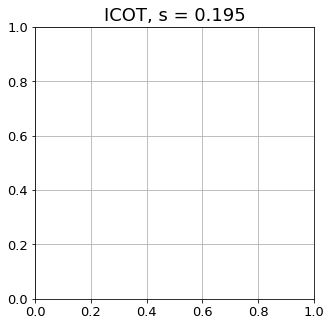

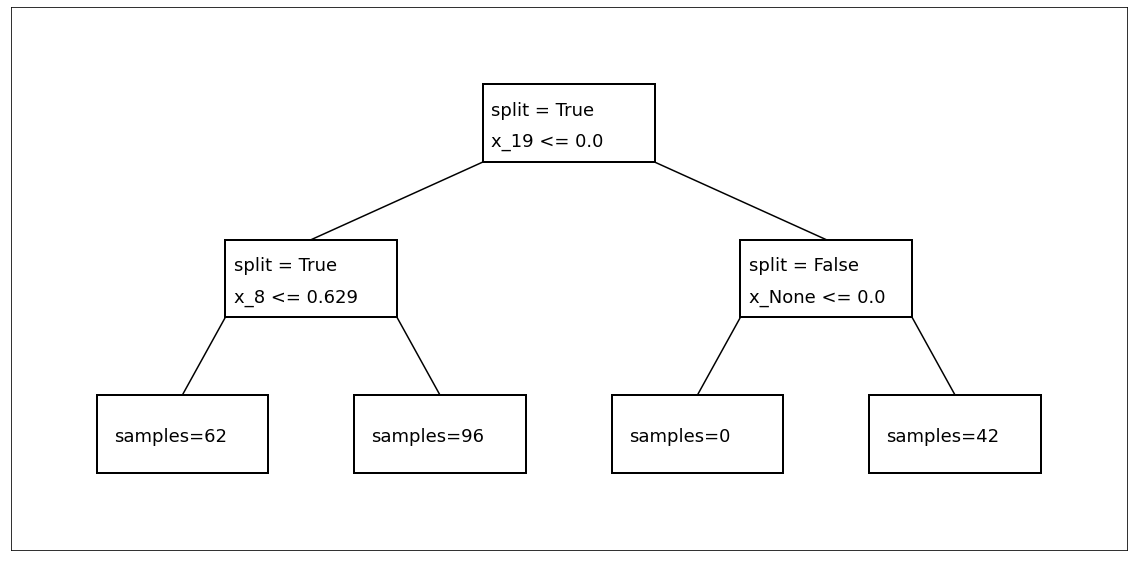

In [7]:
icot_3 = icot_tree_clusters(np.array(df), 2, np.array(my_dist), 3)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08


Set parameter NonConvex to value 2
Set parameter TimeLimit to value 2000
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3426 rows, 3871 columns and 41736 nonzeros
Model fingerprint: 0x016a551f
Model has 2200 quadratic constraints
Model has 1600 general constraints
Variable types: 1603 continuous, 2268 integer (2264 binary)
Coefficient statistics:
  Matrix range     [4e-03, 1e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [3e-02, 1e+00]
  Objective range  [5e-03, 5e-03]
  Bounds range     [4e-01, 2e+02]
  RHS range        [1e+00, 4e+00]
  QRHS range       [1e+00, 1e+00]
  GenCon rhs range [4e+00, 4e+00]
  GenCon coe range [1e+00, 4e+00]
Presolve added 1583 rows and 0 columns
Presolve removed 0 rows and 207 columns
Presolve time: 0.33s
Presolved: 14209 rows, 52

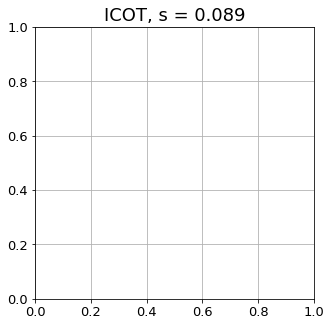

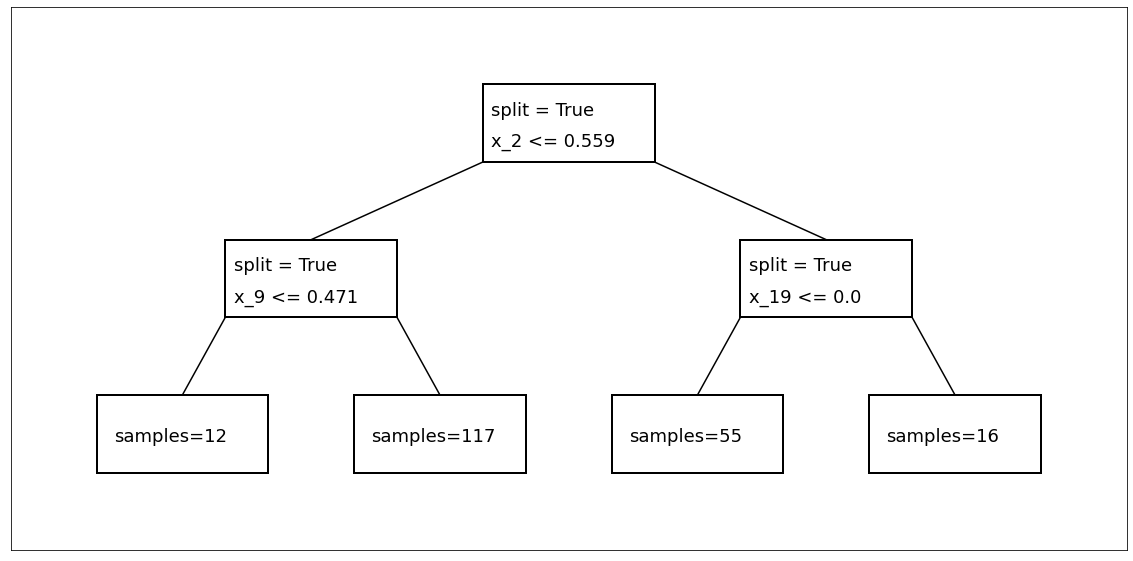

In [5]:
icot_4 = icot_tree_clusters(np.array(df), 2, np.array(my_dist), 4)